In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [3]:
data = pd.read_csv(r'C:\Users\subra\OneDrive - Lake Forest College\Lake Forest College Academics\Data Science\Fish.csv')
data.head(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274
6,Bream,500.0,26.8,29.7,34.5,14.1795,5.2785
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900
8,Bream,450.0,27.6,30.0,35.1,14.0049,4.8438
9,Bream,500.0,28.5,30.7,36.2,14.2266,4.9594


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [5]:
labels = data.Species
features = np.asarray(data)
features = features[:,1:]
len(features)

159

<BarContainer object of 159 artists>

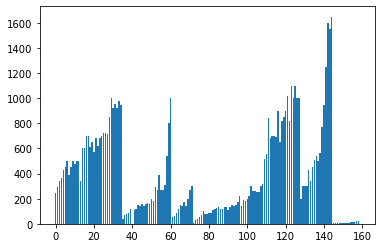

In [13]:
plt.bar(range(159),data.Weight)

In [7]:
species_list = data.Species.unique()
species_list

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

<BarContainer object of 7 artists>

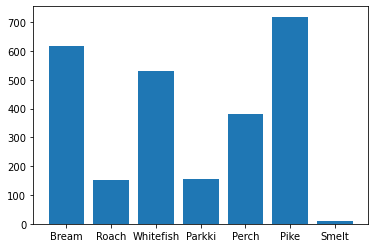

In [8]:
avg = np.zeros([len(species_list),1])
count = 0
for sp in species_list:
    avg[count] = avg[count] + sum(data.Weight[data.Species==sp])
    avg[count] = avg[count] / len(data.Weight[data.Species==sp])
    count = count + 1
plt.bar(species_list,avg[:,0])
    

<BarContainer object of 7 artists>

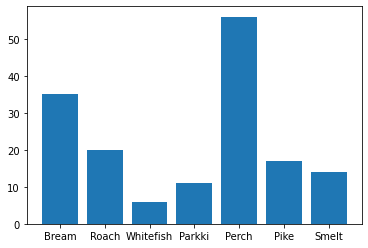

In [9]:
counts = np.zeros([len(species_list),1])
count = 0
for sp in species_list:
    counts[count] = counts[count] + len(data.Weight[data.Species==sp])
    count = count + 1
plt.bar(species_list,counts[:,0])

In [10]:
trainfraction = 0.8
count = 0
for sp in species_list:
    trainnum = np.int16(counts[count,0] * trainfraction)
    testnum = np.int16(counts[count,0] - trainnum)
    thisspecies = data[data.Species==sp]
    features = np.asarray(thisspecies)
    features = features[:,1:]
    labels1 = np.ones([trainnum,1]) * count
    labels2 = np.ones([testnum,1]) * count
    if count==0:
        traindata = features[:trainnum,:]
        testdata = features[trainnum:,:]
        trainlabels = labels1
        testlabels = labels2
    else:
        traindata = np.concatenate((traindata,features[:trainnum,:]), axis=0)
        testdata = np.concatenate((testdata,features[trainnum:,:]), axis=0)
        trainlabels = np.concatenate((trainlabels,labels1), axis=0)
        testlabels = np.concatenate((testlabels,labels2), axis=0)
    count = count + 1
print(traindata.shape,trainlabels.shape,testdata.shape,testlabels.shape)

(124, 6) (124, 1) (35, 6) (35, 1)


In [11]:
model = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial',max_iter=10000)
model.fit(traindata,trainlabels)
print(model.score(testdata, testlabels))

C:\Users\subra\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.6857142857142857


C:\Users\subra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


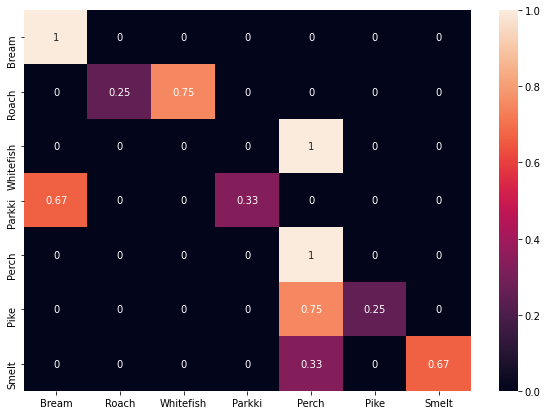

In [12]:
#Visualize performance by Normalized confusion matrix
import seaborn as sn
numClasses = len(species_list)

conf = np.zeros([numClasses,numClasses])
guesses = model.predict(testdata)
for fish in range(len(testlabels)):
    real = np.uint8(testlabels[fish,0])
    guess = np.uint8(guesses[fish])
    conf[real,guess] = conf[real,guess] + 1
    
rowsums = np.sum(conf,1)
rowsums = np.reshape(rowsums,[numClasses,1])
rowsums = np.repeat(rowsums,numClasses, axis = 1)
conf = conf / rowsums

df_cm = pd.DataFrame(conf, index = [i for i in species_list],
                  columns = [i for i in species_list])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
    

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4,whiten=True)
lowtrain = pca.fit_transform(traindata)
lowtrain.shape



In [ ]:
lowtest = pca.transform(testdata)
lowtest.shape

In [ ]:
model = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial',max_iter=10000)
model.fit(lowtrain,trainlabels)
print(model.score(lowtest, testlabels))

In [ ]:
#Visualize performance by Normalized confusion matrix
import seaborn as sn
numClasses = len(species_list)

conf = np.zeros([numClasses,numClasses])
guesses = model.predict(lowtest)
for fish in range(len(testlabels)):
    real = np.uint8(testlabels[fish,0])
    guess = np.uint8(guesses[fish])
    conf[real,guess] = conf[real,guess] + 1
    
rowsums = np.sum(conf,1)
rowsums = np.reshape(rowsums,[numClasses,1])
rowsums = np.repeat(rowsums,numClasses, axis = 1)
conf = conf / rowsums

df_cm = pd.DataFrame(conf, index = [i for i in species_list],
                  columns = [i for i in species_list])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)